<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/epidemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

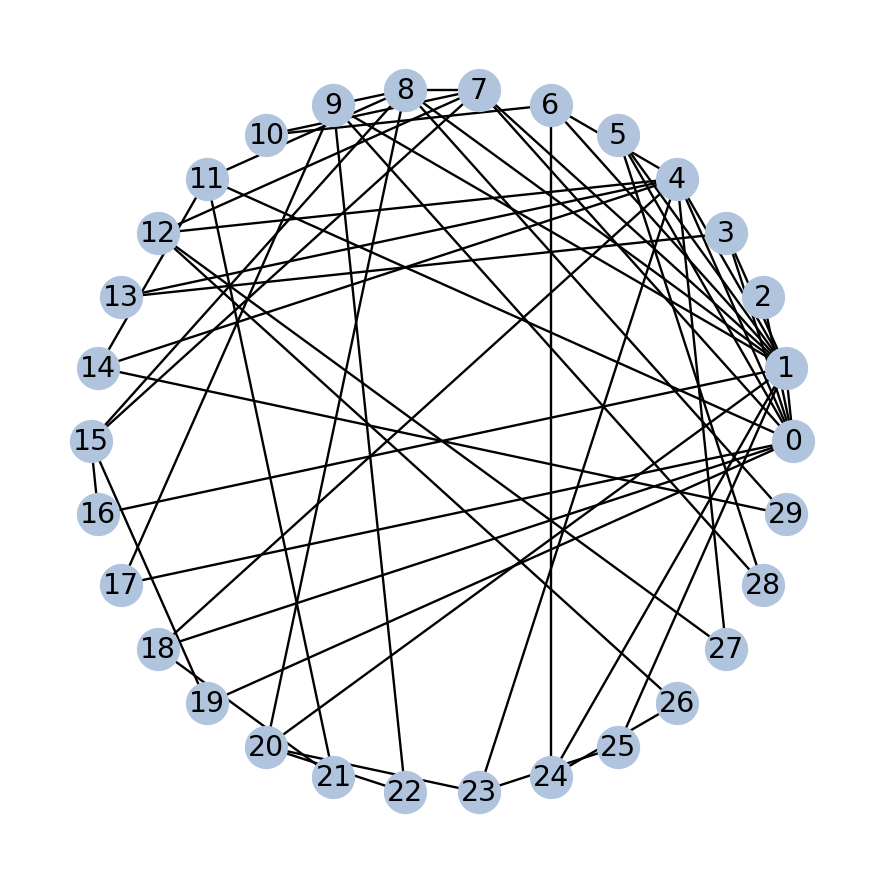

In [293]:
import networkx as nx

n = 30 # how many people (they will arrive one by one)
conn = 2 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn)
L = nx.circular_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (5, 5), dpi =  170)
S = 'lightsteelblue'
nx.draw(G, L, node_color = S)
l = nx.draw_networkx_labels(G, pos = L)

In [294]:
perc = 0.15 # what percentage will be initially infected
sickPeople = round(perc * n)
print(n, sickPeople)

30 4


In [295]:
from random import sample
infected = set(sample(G.nodes, sickPeople))
I = 'goldenrod'

state = [ I if v in infected else S for v in G.nodes ]
print(state)

['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'goldenrod', 'lightsteelblue', 'lightsteelblue', 'goldenrod', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'goldenrod', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'goldenrod', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']


<ipython-input-295-5e5baaa0fa80>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected = set(sample(G.nodes, sickPeople))


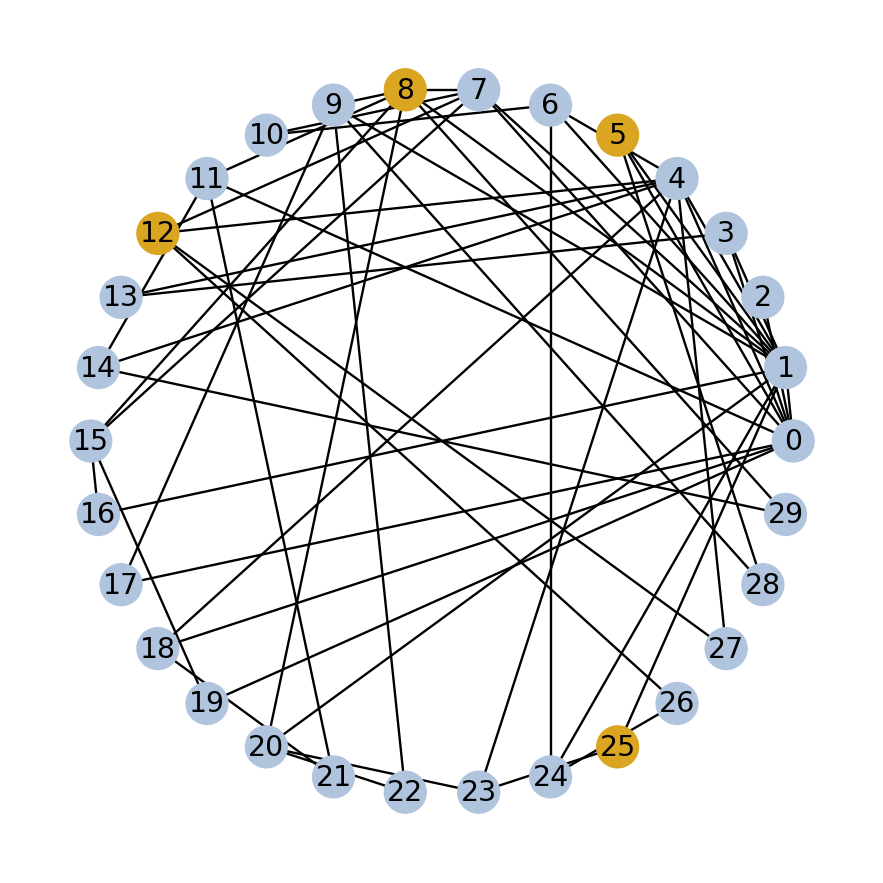

In [296]:
fig = plt.figure(1, figsize = (5, 5), dpi =  170)
nx.draw(G, L, node_color = state)
l = nx.draw_networkx_labels(G, pos = L)

In [297]:
contagion = 0.12 # probability of contagion

from random import random # spit out a number between 0 and 1

print(random() < contagion)
print(random() < contagion)
print(random() < contagion)

False
False
False


In [298]:
len(G.edges)

56

In [299]:
spread = set()
newlyInfected = set()
for v in G.nodes:
  if v in infected:
    for u in G.neighbors(v): # set of nodes with which this one has a connection in the model
      if u not in infected:
        if random() < contagion:
          spread.add((v, u))
          spread.add((u, v))
          newlyInfected.add(u)

len(spread)

10

In [300]:
len(infected)

4

In [301]:
newlyInfected

{7, 20, 23, 26}

In [302]:
spread

{(7, 8),
 (7, 12),
 (8, 7),
 (8, 20),
 (12, 7),
 (12, 26),
 (20, 8),
 (23, 25),
 (25, 23),
 (26, 12)}

In [303]:
print(infected, newlyInfected)
infected.update(newlyInfected)
print(infected)

{8, 25, 12, 5} {26, 20, 23, 7}
{5, 7, 8, 12, 20, 23, 25, 26}


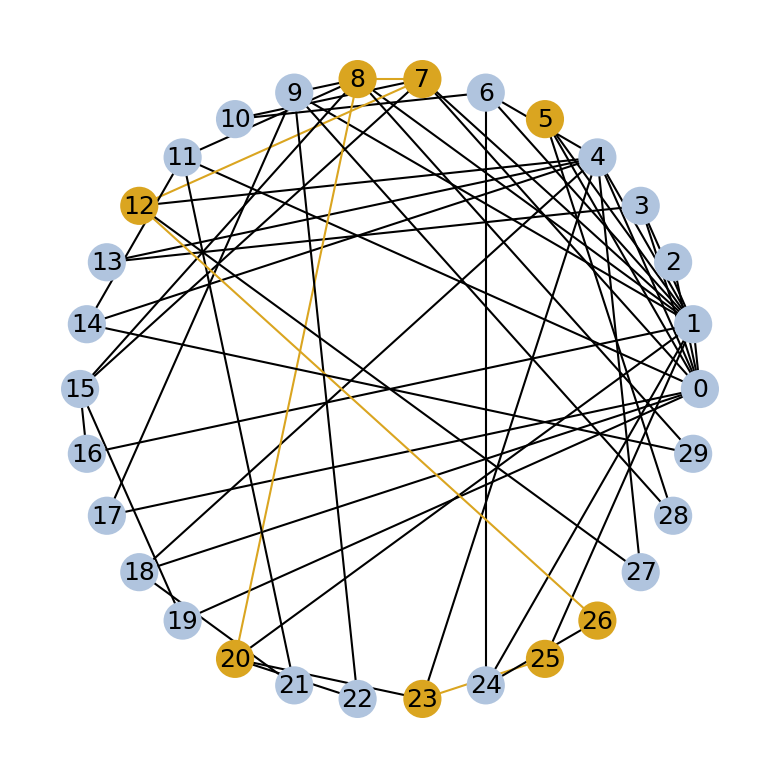

In [304]:
# colors
Vs = [ I if v in infected else S for v in G.nodes ]
Es = [ I if (v, u) in spread else 'black' for v, u in G.edges ]

# drawing
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs, edge_color = Es)
l = nx.draw_networkx_labels(G, pos = L)

In [305]:
recovery = 0.5 # probability of recovery

recovered = set()
for v in infected:
  if random() < recovery:
    recovered.add(v)
infected -= recovered

recovered

{5, 7, 8, 12, 20, 25}

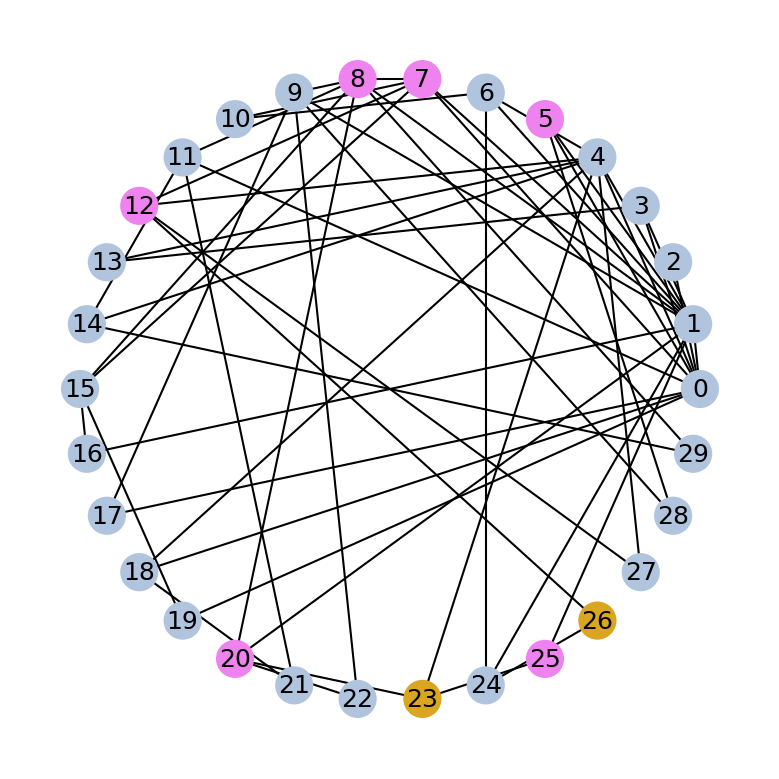

In [306]:
R = 'violet'
Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs)
l = nx.draw_networkx_labels(G, pos = L)

In [307]:
def contagions(contagion = 0.05):
  global spread, infected
  newlyInfected = set()
  for v in infected:
      for u in G.neighbors(v):
        if u in infected: # already sick
          continue
        if u in recovered: # no re-infection
          continue
        if random() < contagion:
          spread.add((v, u))
          spread.add((u, v))
          newlyInfected.add(u)
  infected.update(newlyInfected)

def recoveries(recovery = 0.5):
  global recovered, infected
  for v in infected:
    if random() < recovery:
      recovered.add(v)
  infected -= recovered

def visualize():
  global G, L, infected, recovered, spread
  Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
  Es = [ I if (v, u) in spread else 'black' for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

def epidemic(t):
  visualize()
  contagions()
  recoveries()

def init(people = 25, contacts = 3, perc = 0.15):
  global G, L, recovered, spread, infected
  G = nx.barabasi_albert_graph(people, contacts)
  L = nx.circular_layout(G)
  recovered = set() # nobody yet
  spread = set() # nothing yet
  infected = set(sample(list(G.nodes), round(perc * people)))
  visualize()

Start I {24, 16, 20, 9}


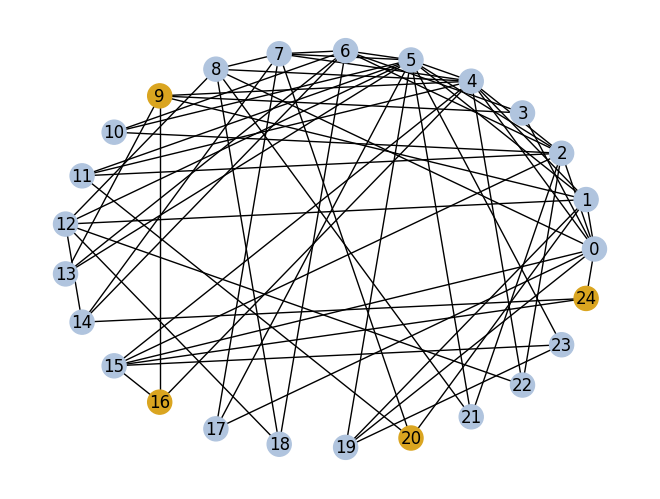

In [308]:
init() # test for seeing what happens

print('Start I', infected)

I after step 1 (currently ill) {20, 24}
R after step 1 (cumulative): 1 {16, 9}
I after step 2 (currently ill) {20}
R after step 2 (cumulative): 2 {16, 9, 24}


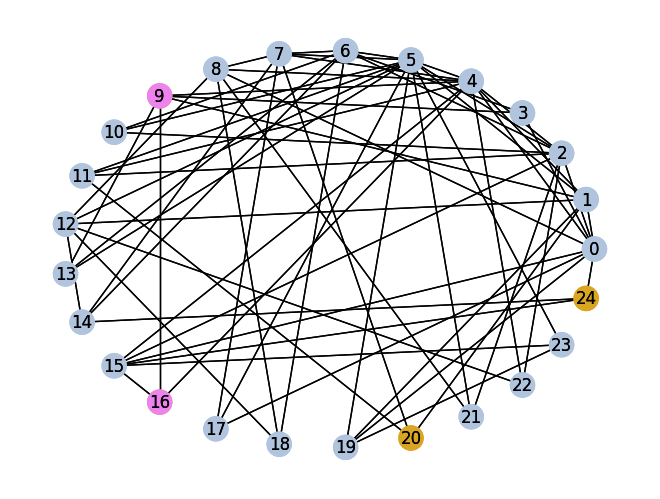

In [309]:
for step in range(1, 3):
  epidemic(step)
  print('I after step', step, '(currently ill)', infected)
  print('R after step', step, '(cumulative):', step, recovered)

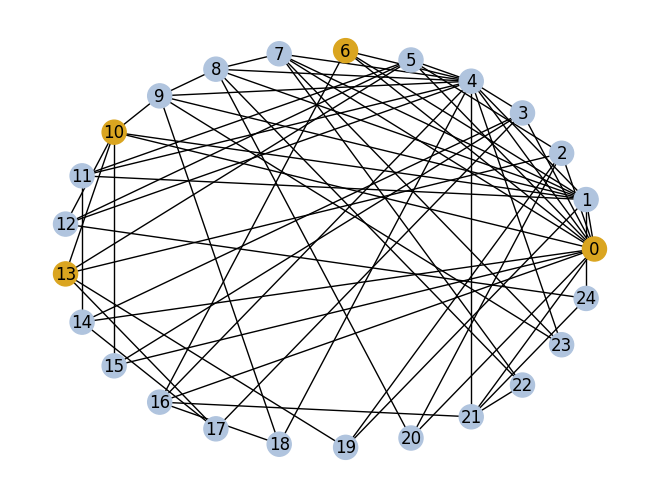

In [310]:
init() # reset to make the animation

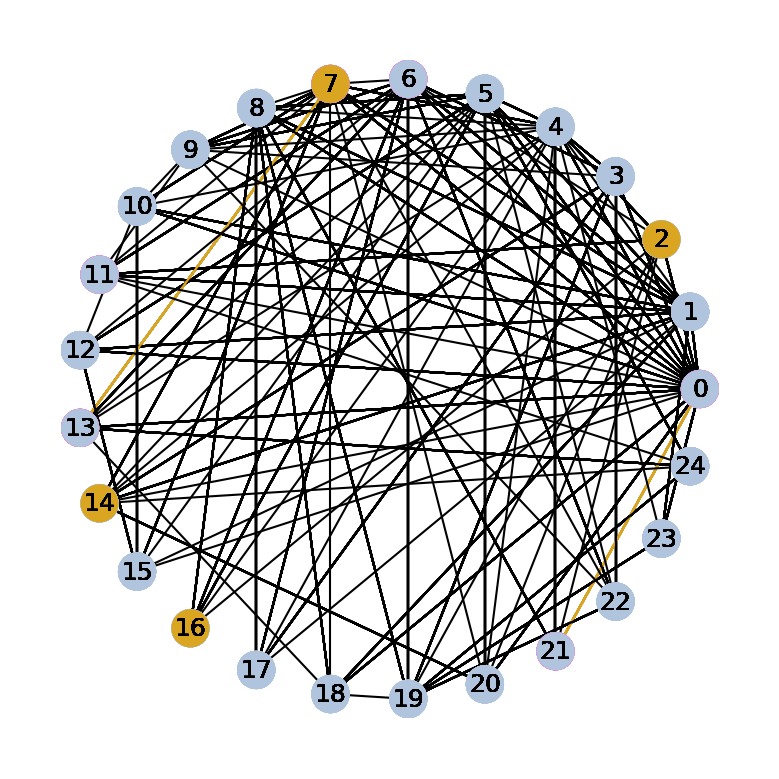

In [311]:
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

duration = 15
fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.clf()

animation.FuncAnimation(fig, epidemic, frames = duration, repeat = False, init_func = init)

S [96, 96, 96, 96, 95, 95, 95, 93, 92, 89]
I [4, 4, 4, 4, 5, 5, 5, 7, 7, 10]
R [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


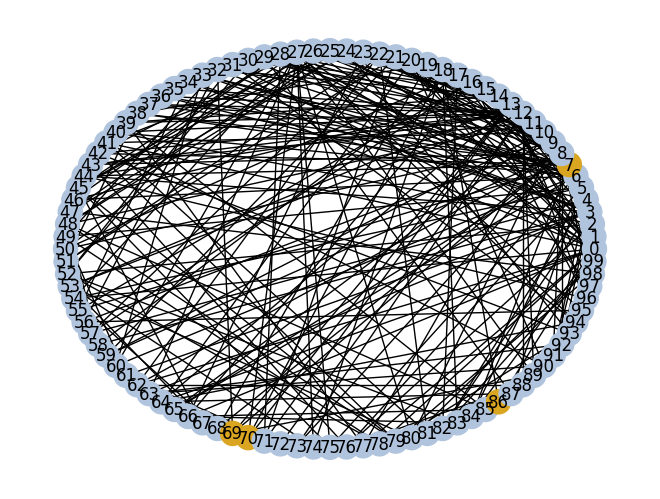

In [312]:
timeseries = { 'S' : [], 'I' : [], 'R' : [] }
n = 100
init(n, 3, 0.04)
while len(infected) > 0:
    contagions(0.02)
    recoveries(0.05)
    i = len(infected)
    r = len(recovered)
    s = n - (i + r) # the rest
    timeseries['S'].append(s)
    timeseries['I'].append(i)
    timeseries['R'].append(r)

for kind in timeseries:
    print(kind, timeseries[kind][:10]) # just the start

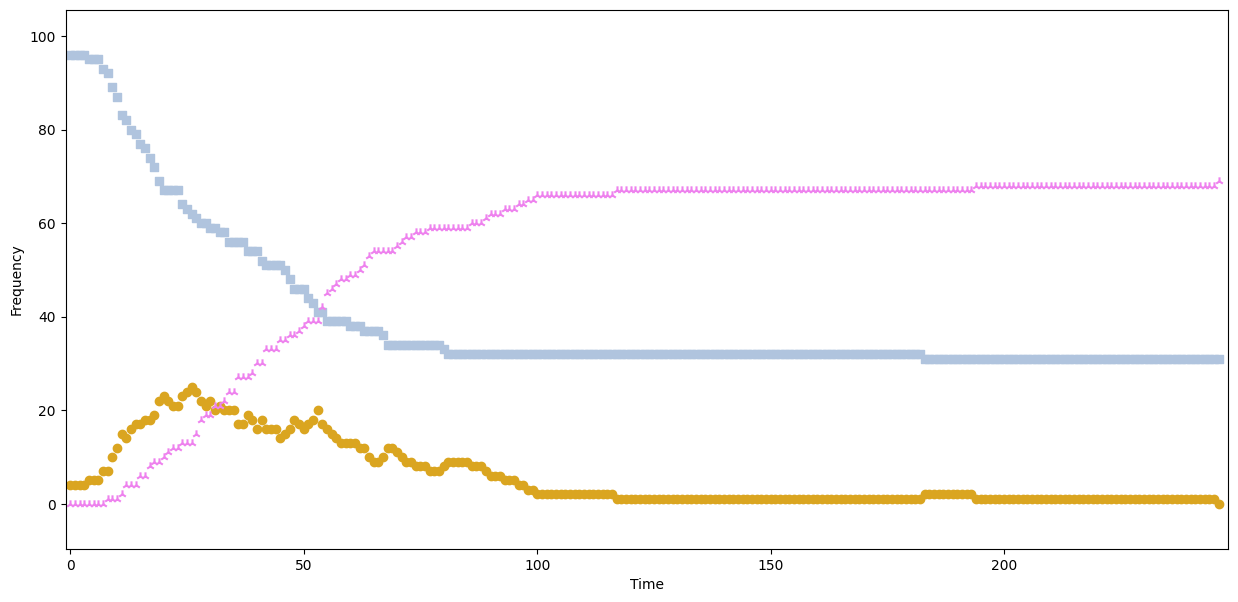

In [313]:
fig = plt.figure(figsize = (15, 7), dpi =  100)
ax = plt.subplot(1, 1, 1)
l = len(timeseries['S'])
plt.xlim(-1, l + 1)
high = max ( [ max(d) for d in timeseries.values() ] )
margin = 0.1 * high
plt.ylim(0 - margin, high + margin)
color = { 'I' : I, 'S' : S, 'R' : R }
marker = { 'I' : 'o', 'S' : 's', 'R' : '2'}
t = [ i for i in range(l) ]
for kind in timeseries:
    ax.scatter(t, timeseries[kind], c = color[kind], marker = marker[kind])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()